# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import random
# magic word for producing visualizations in notebook
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('./Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info =  pd.read_csv('./AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

In [4]:
# rows and columns of azdias dataset
azdias.shape

(891221, 85)

In [5]:
# rows and columns of feat_info dataset
feat_info.shape

(85, 4)

In [6]:
# list of column names
list(azdias)

['AGER_TYP',
 'ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GEBURTSJAHR',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'TITEL_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ALTER_HH',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'KK_KUNDENTYP',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAME

In [7]:
list(feat_info)

['attribute', 'information_level', 'type', 'missing_or_unknown']

In [8]:
# first few records
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [9]:
# first few records
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [10]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [11]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [12]:
# sizes of information_level
feat_info.groupby('information_level').size()

information_level
building           7
community          3
household          7
macrocell_plz8     8
microcell_rr3      6
microcell_rr4      3
person            43
postcode           3
region_rr1         5
dtype: int64

In [13]:
# sizes of measurement scale types
feat_info.groupby('type').size()

type
categorical    21
interval        1
mixed           7
numeric         7
ordinal        49
dtype: int64

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [14]:
# Identify missing or unknown data values and convert them to NaNs.

In [15]:
# Initially missing values ratio
azdias.isnull().mean().sort_values(ascending=False)[:10]

KK_KUNDENTYP    0.655967
KBA05_ANTG1     0.149597
KBA05_ANTG2     0.149597
KBA05_ANTG3     0.149597
KBA05_ANTG4     0.149597
KBA05_BAUMAX    0.149597
KBA05_GBZ       0.149597
MOBI_REGIO      0.149597
REGIOTYP        0.135989
KKK             0.135989
dtype: float64

In [16]:
# Count of initially missing values
initially_missing = azdias.isnull().sum().sum()
initially_missing

4896838

In [17]:
for i in range(azdias.shape[1]):
    # Extract the string based on respective indices
    str_missing_or_unknown = feat_info.iloc[i]['missing_or_unknown']
    # Depending on the datatype of values in azdias columns (object vs int), parse string to list of same datatype
    try:
        lst_missing_or_unknown = ast.literal_eval(str_missing_or_unknown)
    except (ValueError):
        lst_missing_or_unknown = str_missing_or_unknown.strip("[]").split(",")
    # if list is not empty
    if lst_missing_or_unknown:
        azdias.iloc[:,i].replace(lst_missing_or_unknown, np.nan, inplace=True)

In [18]:
# after missing values encoding is applied
azdias.isnull().mean().sort_values(ascending=False)[:10]

TITEL_KZ          0.997576
AGER_TYP          0.769554
KK_KUNDENTYP      0.655967
KBA05_BAUMAX      0.534687
GEBURTSJAHR       0.440203
ALTER_HH          0.348137
REGIOTYP          0.177357
KKK               0.177357
W_KEIT_KIND_HH    0.166051
KBA05_ANTG4       0.149597
dtype: float64

In [19]:
# Data that takes on a 'missing' or 'unknown' code plus initially missing values
total_missing = azdias.isnull().sum().sum()
total_missing

8373929

In [20]:
# Data that takes on a 'missing' or 'unknown' code
total_missing - initially_missing

3477091

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [21]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# The ratio of missing data in each column
missing_data_ratio = azdias.isnull().mean()

In [22]:
missing_data_ratio

AGER_TYP                 0.769554
ALTERSKATEGORIE_GROB     0.003233
ANREDE_KZ                0.000000
CJT_GESAMTTYP            0.005446
FINANZ_MINIMALIST        0.000000
FINANZ_SPARER            0.000000
FINANZ_VORSORGER         0.000000
FINANZ_ANLEGER           0.000000
FINANZ_UNAUFFAELLIGER    0.000000
FINANZ_HAUSBAUER         0.000000
FINANZTYP                0.000000
GEBURTSJAHR              0.440203
GFK_URLAUBERTYP          0.005446
GREEN_AVANTGARDE         0.000000
HEALTH_TYP               0.124768
LP_LEBENSPHASE_FEIN      0.109549
LP_LEBENSPHASE_GROB      0.106115
LP_FAMILIE_FEIN          0.087287
LP_FAMILIE_GROB          0.087287
LP_STATUS_FEIN           0.005446
LP_STATUS_GROB           0.005446
NATIONALITAET_KZ         0.121536
PRAEGENDE_JUGENDJAHRE    0.121366
RETOURTYP_BK_S           0.005446
SEMIO_SOZ                0.000000
SEMIO_FAM                0.000000
SEMIO_REL                0.000000
SEMIO_MAT                0.000000
SEMIO_VERT               0.000000
SEMIO_LUST    

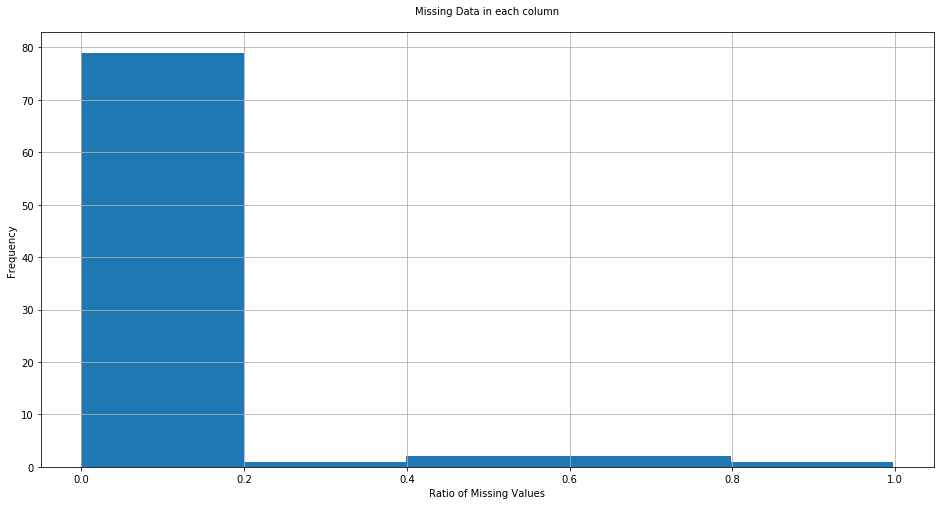

In [23]:
fig, ax = plt.subplots()
ax.hist(missing_data_ratio, bins=5)
plt.grid()
plt.xlabel('Ratio of Missing Values') 
plt.ylabel('Frequency')
plt.title('Missing Data in each column\n', fontsize = 10)
plt.gcf().set_size_inches(16, 8)
plt.show()

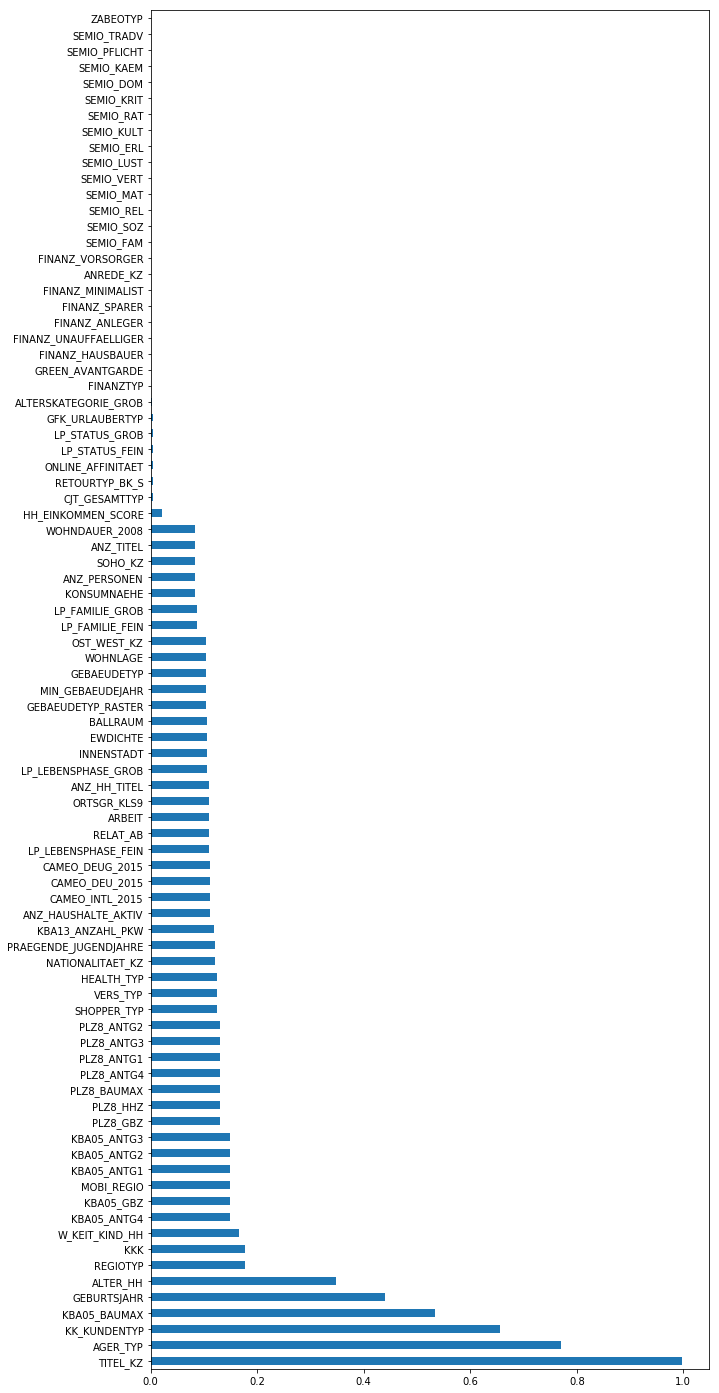

In [24]:
# Missing value ratio in each columns
plt.figure(figsize=(10,25))
missing_data_ratio.sort_values(ascending=False).plot(kind='barh')

In [25]:
# Investigate patterns in the amount of missing data in each column.

In [26]:
# columns with more than 20% missing values
missing_data_ratio_gt_20 = missing_data_ratio[missing_data_ratio>.2]
missing_data_ratio_gt_20

AGER_TYP        0.769554
GEBURTSJAHR     0.440203
TITEL_KZ        0.997576
ALTER_HH        0.348137
KK_KUNDENTYP    0.655967
KBA05_BAUMAX    0.534687
dtype: float64

In [27]:
missing_data_eng_description = dict({'AGER_TYP': 'Best Ager Typology', 
'GEBURTSJAHR':     'Year of Birth', 
'TITEL_KZ':        'Academic Title Flag', 
'ALTER_HH':        'Birthdate of head of household', 
'KK_KUNDENTYP':    'Consumer pattern over past 12 months',  
'KBA05_BAUMAX':    'Most common building type within the microcell'})

In [28]:
for i in range (len(missing_data_ratio_gt_20)):
    column_name = missing_data_ratio_gt_20.index[i]
    print ('Column name: ', column_name)
    print ('Column description in english: ', missing_data_eng_description.get(column_name))
    print ('Data Type: ', feat_info[feat_info.attribute == column_name].iloc[0]['type'])
    print ('Information Level: ', feat_info[feat_info.attribute == column_name].iloc[0]['information_level'])
    print ('Missing Data Ratio: ', missing_data_ratio_gt_20[i])
    print ('****************************************\n')

Column name:  AGER_TYP
Column description in english:  Best Ager Typology
Data Type:  categorical
Information Level:  person
Missing Data Ratio:  0.769554352961
****************************************

Column name:  GEBURTSJAHR
Column description in english:  Year of Birth
Data Type:  numeric
Information Level:  person
Missing Data Ratio:  0.440202822869
****************************************

Column name:  TITEL_KZ
Column description in english:  Academic Title Flag
Data Type:  categorical
Information Level:  person
Missing Data Ratio:  0.997576358726
****************************************

Column name:  ALTER_HH
Column description in english:  Birthdate of head of household
Data Type:  interval
Information Level:  household
Missing Data Ratio:  0.348136994079
****************************************

Column name:  KK_KUNDENTYP
Column description in english:  Consumer pattern over past 12 months
Data Type:  categorical
Information Level:  household
Missing Data Ratio:  0.65596748

In [29]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(list(missing_data_ratio_gt_20.index), axis=1, inplace=True)

In [30]:
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [31]:
list(azdias)

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CAMEO_INTL_2015',
 'KBA05_ANTG1',
 'K

In [32]:
azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

4896838 data points were initially missing in the dataset. An additional 3477091 data points had values that had labels representing missing or unknown values. In real world conditions, there are going to be values that will be missing. For example, if data were collected via questionnaires, people will skip certain questions. 

Even though more data is always good, having missing data can produce inaccurate results. A lot of domain expertise is required to understand the importance of each data attribute. Sometimes, even when there are plenty of missing values representing an attribute, the importance of the attribute itself might be useful enough to not get rid of the attribute for analysis. Other times, performing analysis on an attribute with a significant ratio of missing data will lead to inaccurate modelling. Similarly, defining 'a significant ratio of missing data' also comes from domain knowlegde. 

For our purposes, using visualizations, we observe that six columns have more than 20% of values missing. While some of the attribute such as represented by column GEBURTSJAHR (Year of birth) is important and KK_KUNDENTYP (Consumer pattern over past 12 months) is important because it encompasses and can act as a proxy attribute for several other attributes, I decided to remove them from the dataset because of a significant missing value ratio compared to other attributes. 

The columns that were removed from the dataset had more than 20% missing values and they are AGER_TYP,  
GEBURTSJAHR, TITEL_KZ, ALTER_HH, KK_KUNDENTYP, KBA05_BAUMAX      

None of the columns that are removed contain ordinal data.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [33]:
# How much data is missing in each row of the dataset?`

In [34]:
# ratio of data missing in each row
missing_data_ratio_row = azdias.isnull().mean(axis=1)
missing_data_ratio_row

0         0.544304
1         0.000000
2         0.000000
3         0.088608
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.594937
12        0.075949
13        0.101266
14        0.594937
15        0.101266
16        0.075949
17        0.594937
18        0.037975
19        0.000000
20        0.126582
21        0.000000
22        0.000000
23        0.101266
24        0.594937
25        0.063291
26        0.240506
27        0.000000
28        0.000000
29        0.025316
            ...   
891191    0.000000
891192    0.000000
891193    0.000000
891194    0.000000
891195    0.000000
891196    0.000000
891197    0.000000
891198    0.000000
891199    0.000000
891200    0.000000
891201    0.000000
891202    0.000000
891203    0.177215
891204    0.000000
891205    0.000000
891206    0.000000
891207    0.000000
891208    0.037975
891209    0.000000
891210    0.000000
891211    0.000000
891212    0.

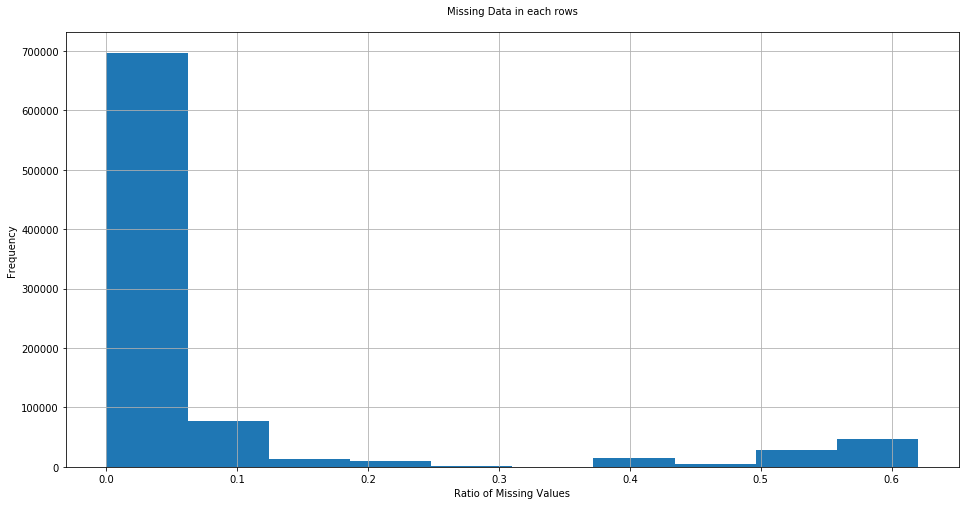

In [35]:
fig, ax = plt.subplots()
ax.hist(missing_data_ratio_row, bins=10)
plt.grid()
plt.xlabel('Ratio of Missing Values') 
plt.ylabel('Frequency')
plt.title('Missing Data in each rows\n', fontsize = 10)
plt.gcf().set_size_inches(16, 8)
plt.show()

In [36]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

In [37]:
# Based on the visualization a threshold is determined
threshold = 0.1

In [38]:
# Generating a list of row indices where threshold is exceeded
threshold_matching_index = list(missing_data_ratio_row[missing_data_ratio_row>threshold].index)

In [39]:
# dividing the dataset into two subsets based on the number of missing values in each row
azdias_above_missing_threshold = azdias[azdias.index.isin(threshold_matching_index)]
azdias_below_missing_threshold = azdias[~azdias.index.isin(threshold_matching_index)]

In [40]:
azdias_above_missing_threshold.shape

(144112, 79)

In [41]:
azdias_below_missing_threshold.shape

(747109, 79)

In [42]:
# checking if the division went according to plan
azdias.shape[0] - azdias_above_missing_threshold.shape[0] - azdias_below_missing_threshold.shape[0]

0

In [43]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
def plot_compare(column_list):
    fig, ax = plt.subplots(len(column_list), 2)
    for i in range(len(column_list)):
        sns.countplot(x=column_list[i], data=azdias_below_missing_threshold, ax=ax[i,0], color='green').set_title("Below Missing Threshold of ("+ str(threshold)+")" )
        sns.countplot(x=column_list[i], data=azdias_above_missing_threshold, ax=ax[i,1], color='red').set_title("Above Missing Threshold of ("+ str(threshold)+")" )
    plt.gcf().set_size_inches(16, 8*len(column_list))

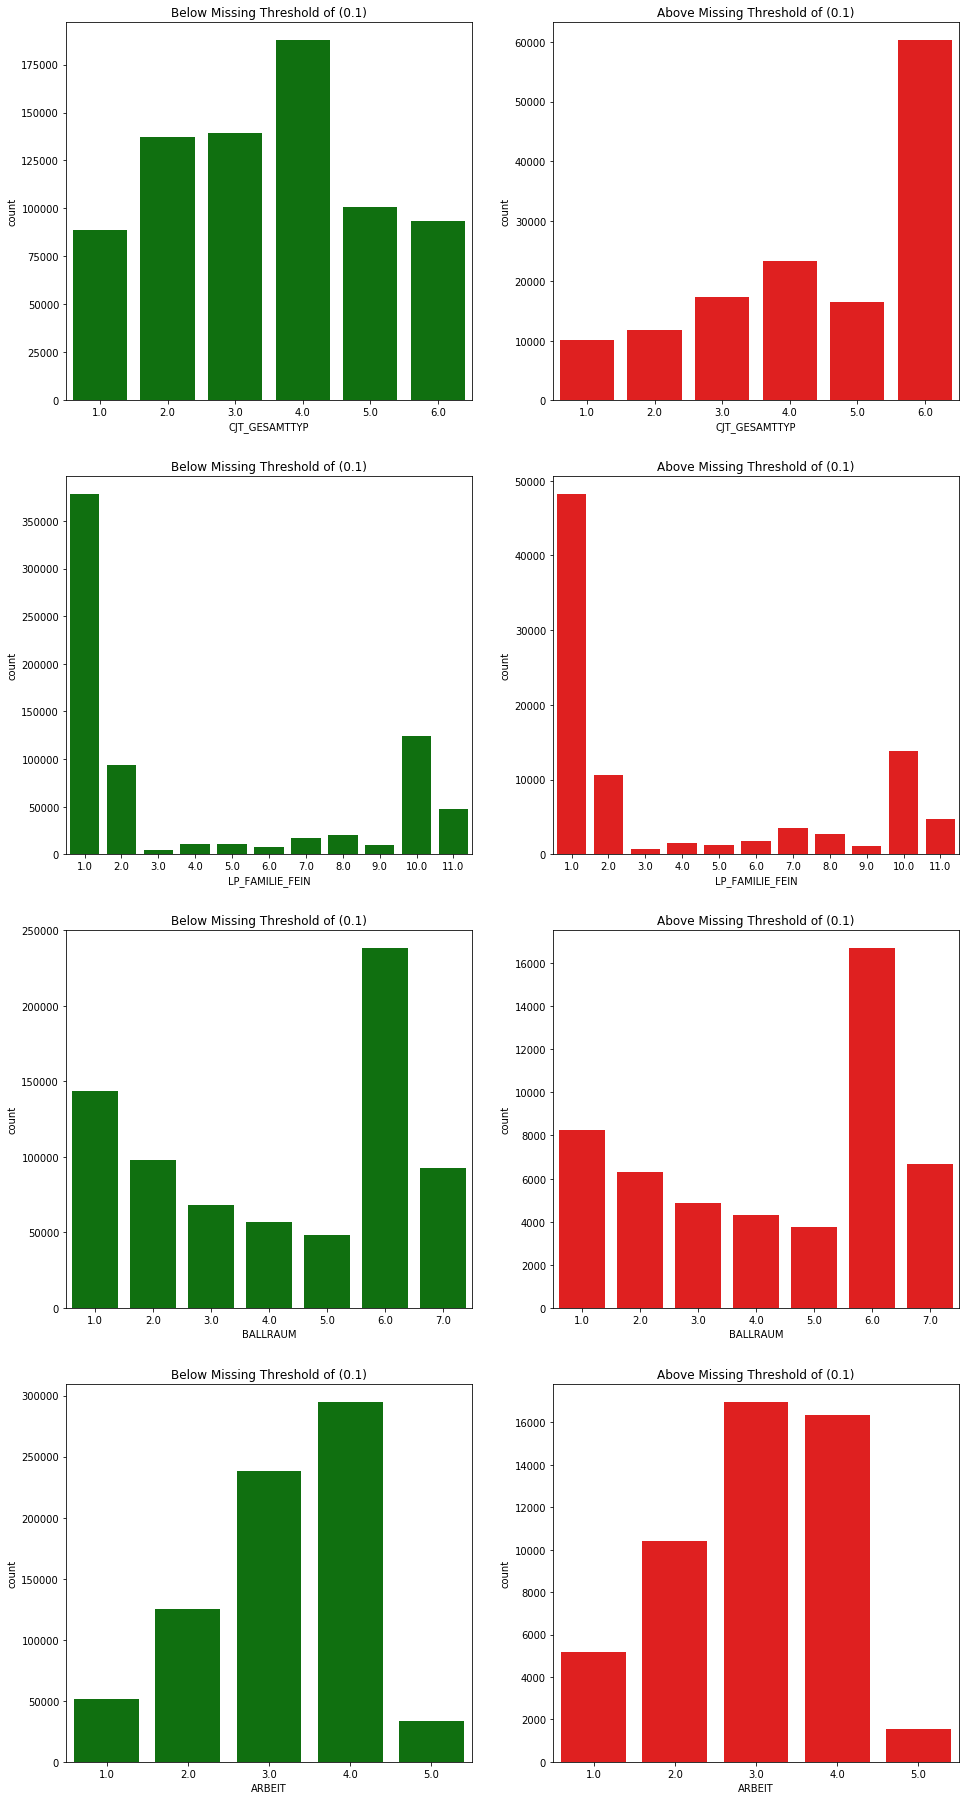

In [44]:
# randomly select 4 attributes to compare
plot_compare(random.sample(list(azdias), 4))

In [45]:
# new variable assigned to make sure exceptions do not happen as a result of randomly picking
# columns that were previously removed while plotting rest of the charts
new_feat_info = feat_info.set_index('attribute').drop(missing_data_ratio_gt_20.index).reset_index()

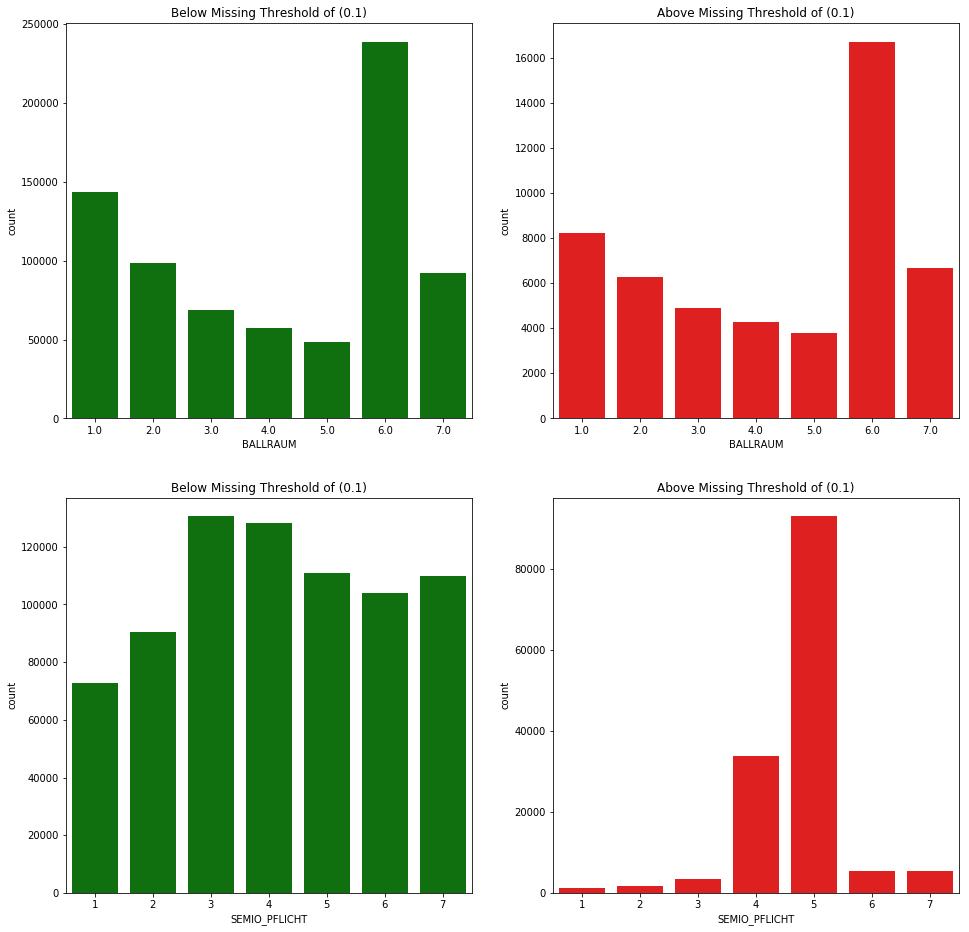

In [46]:
# randomly select 2 attributes of type ordinal
plot_compare(random.sample(list(new_feat_info.loc[new_feat_info.type=='ordinal']['attribute']), 2))

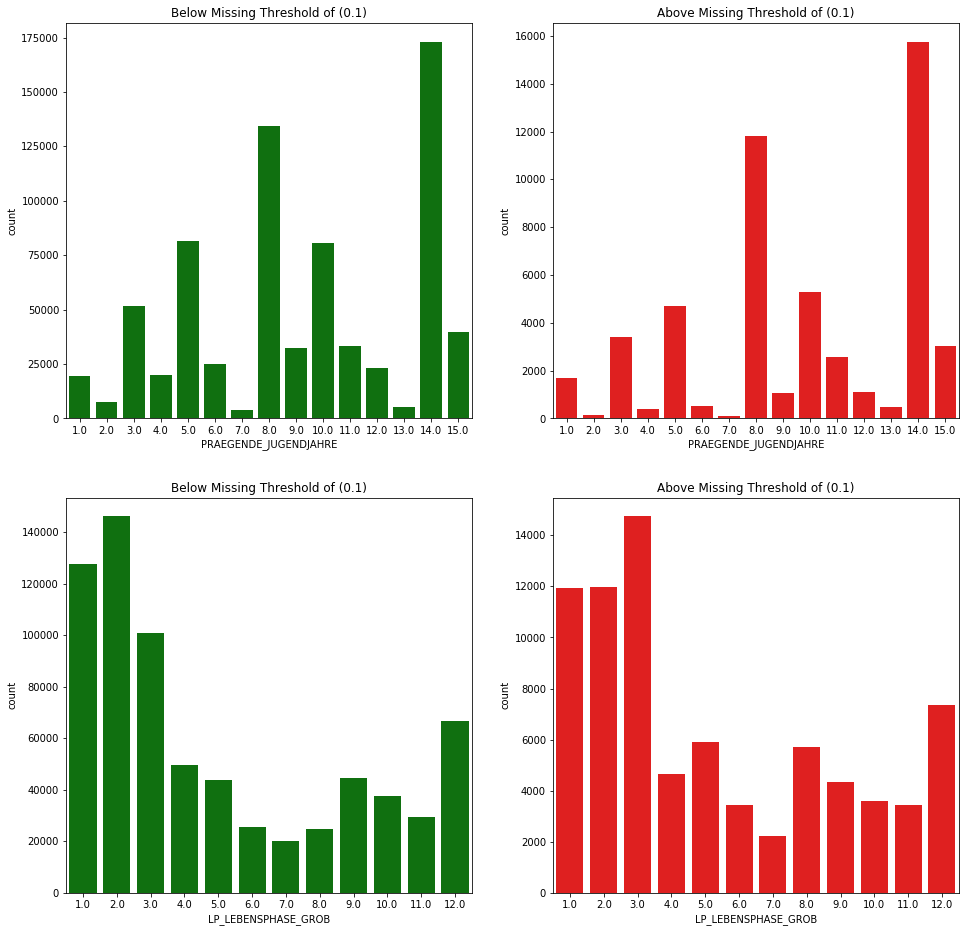

In [47]:
# randomly select 2 attributes of type mixed
plot_compare(random.sample(list(new_feat_info.loc[new_feat_info.type=='mixed']['attribute']), 2))

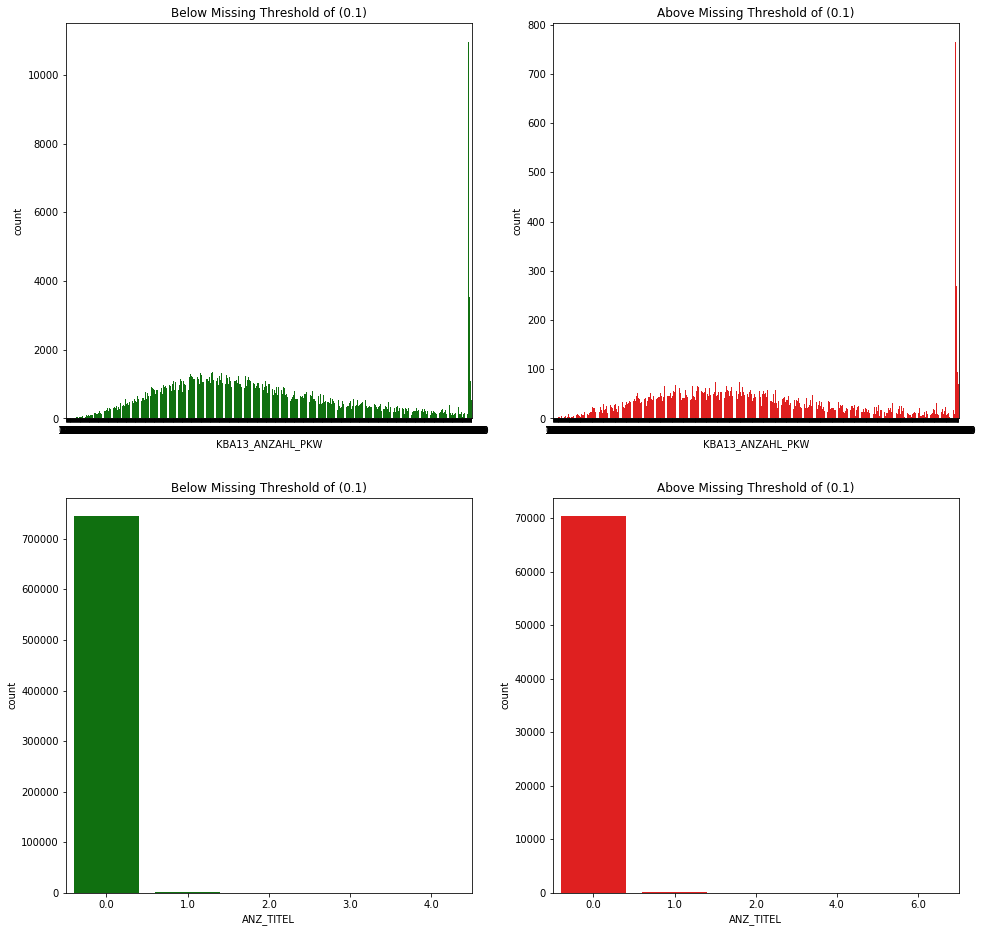

In [48]:
# randomly select 2 attributes of type numeric
plot_compare(random.sample(list(new_feat_info.loc[new_feat_info.type=='numeric']['attribute']), 2))

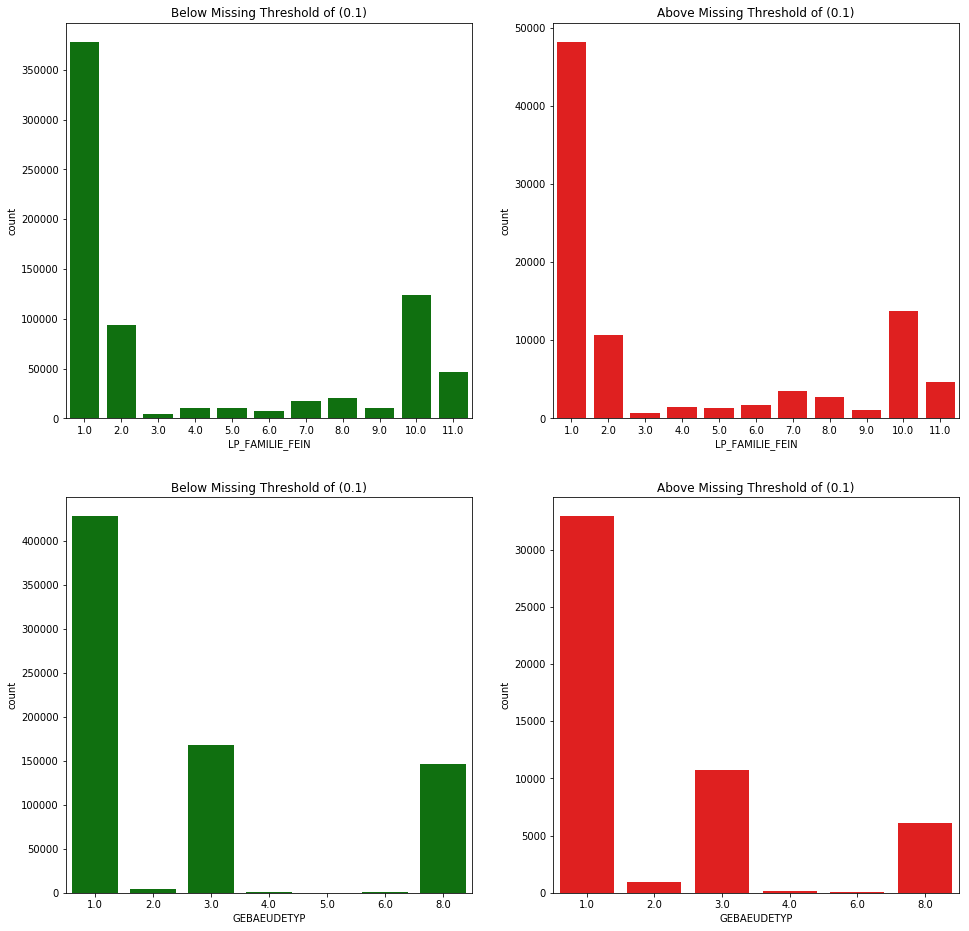

In [49]:
# randomly select 2 attributes of type categorical
plot_compare(random.sample(list(new_feat_info.loc[new_feat_info.type=='categorical']['attribute']), 2))

#### Discussion 1.1.3: Assess Missing Data in Each Row

While there were some rows with more than 60% missing values, overall, the dataset has significant number of rows with all values present. When rows with at least 10% missing data were split to create a separate dataset, the two datasets columns in some cases were qualitatively similar. Some of these columns include GREEN_AVANTGARDE (Membership in environmental sustainability as part of youth), ANZ_TITEL (Number of professional academic title holders in household), PLZ8_BAUMAX (Most common building type within the PLZ8 region), ALTERSKATEGORIE_GROB (Estimated age based on given name analysis), LP_FAMILIE_FEIN (Family type, fine scale), SOHO_KZ (Small office / home office flag) etc. On the other hand, some of them were qualitatively different. Some of these columns include financial data such as FINANZ_VORSORGER, FINANZ_UNAUFFAELLIGER, FINANZ_SPARER, VERS_TYP (Insurance typology) etc. Albeit not in all cases, the difference in dataset seems qualitatively similar for demographic data but dissimilar for financial data. 

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [50]:
# How many features are there of each data type?

# Since a few columns were removed new_feat_info is used to assess features of each data type
new_feat_info.groupby('type').size()

type
categorical    18
mixed           6
numeric         6
ordinal        49
dtype: int64

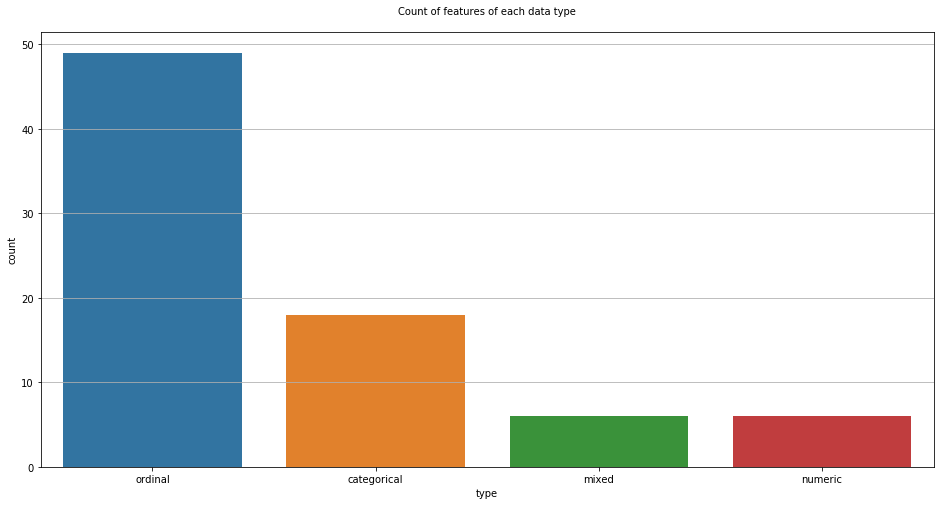

In [51]:
fig, ax = plt.subplots()
plt.grid()
plt.title('Count of features of each data type\n', fontsize = 10)
sns.countplot(x='type', data=new_feat_info)
plt.gcf().set_size_inches(16, 8)

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [52]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

In [53]:
# List of columns with categorical data
list_categorical = list(new_feat_info.loc[new_feat_info.type=='categorical']['attribute'])

In [54]:
azdias_below_missing_threshold[list_categorical].dtypes

ANREDE_KZ             int64
CJT_GESAMTTYP       float64
FINANZTYP             int64
GFK_URLAUBERTYP     float64
GREEN_AVANTGARDE      int64
LP_FAMILIE_FEIN     float64
LP_FAMILIE_GROB     float64
LP_STATUS_FEIN      float64
LP_STATUS_GROB      float64
NATIONALITAET_KZ    float64
SHOPPER_TYP         float64
SOHO_KZ             float64
VERS_TYP            float64
ZABEOTYP              int64
GEBAEUDETYP         float64
OST_WEST_KZ          object
CAMEO_DEUG_2015      object
CAMEO_DEU_2015       object
dtype: object

In [55]:
# Querying unique number of elements in categoricals
azdias_below_missing_threshold[list_categorical].nunique() 

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

In [56]:
# Querying to find out which binary variable takes on non-numeric value
(azdias_below_missing_threshold[list_categorical].dtypes == object) & \
(azdias_below_missing_threshold[list_categorical].nunique()==2) 

ANREDE_KZ           False
CJT_GESAMTTYP       False
FINANZTYP           False
GFK_URLAUBERTYP     False
GREEN_AVANTGARDE    False
LP_FAMILIE_FEIN     False
LP_FAMILIE_GROB     False
LP_STATUS_FEIN      False
LP_STATUS_GROB      False
NATIONALITAET_KZ    False
SHOPPER_TYP         False
SOHO_KZ             False
VERS_TYP            False
ZABEOTYP            False
GEBAEUDETYP         False
OST_WEST_KZ          True
CAMEO_DEUG_2015     False
CAMEO_DEU_2015      False
dtype: bool

In [57]:
# "OST_WEST_KZ" is the binary variable that takes on non-numeric values based on the observation above.
# Building location via former East / West Germany (GDR / FRG)
# converting to numeric category
df = azdias_below_missing_threshold.copy()
df['OST_WEST_KZ'].replace({'O': 0, 'W': 1}, inplace=True)

In [58]:
# multi_level categories labels
multi_level_category_labels = azdias_below_missing_threshold[list_categorical].nunique()>2
multi_level_category_labels

ANREDE_KZ           False
CJT_GESAMTTYP        True
FINANZTYP            True
GFK_URLAUBERTYP      True
GREEN_AVANTGARDE    False
LP_FAMILIE_FEIN      True
LP_FAMILIE_GROB      True
LP_STATUS_FEIN       True
LP_STATUS_GROB       True
NATIONALITAET_KZ     True
SHOPPER_TYP          True
SOHO_KZ             False
VERS_TYP            False
ZABEOTYP             True
GEBAEUDETYP          True
OST_WEST_KZ         False
CAMEO_DEUG_2015      True
CAMEO_DEU_2015       True
dtype: bool

In [59]:
list_to_drop = multi_level_category_labels.index[multi_level_category_labels].tolist()
list_to_drop

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [60]:
# all the other multi level categories are dropped to keep things straightforward
df.drop(list_to_drop, axis=1, inplace = True)

In [61]:
df.shape

(747109, 66)

#### Discussion 1.2.1: Re-Encode Categorical Features

Numeric and interval data are kept the same, ie, no encoding were performed on those columns. For simplifications, ordinal values are treated as numeric in nature, and thus, no encoding were performed there as well. In total, there were 18 categorical, 6 mixed, 6 numeric and 49 ordinal features. "OST_WEST_KZ" is the binary variable that takes on non-numeric value. 
It was converted into numeric type. Rest of the categorical type columns were dropped from the dataset to keep things straight forward. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [62]:
# List of columns with mixed data
list_mixed = list(new_feat_info.loc[new_feat_info.type=='mixed']['attribute'])
list_mixed

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'PLZ8_BAUMAX']

In [63]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

In [64]:
# creating two dictionaries for mapping "PRAEGENDE_JUGENDJAHRE"
dict_decade = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 3,
    6: 3,
    7: 3,
    8: 4,
    9: 4,
    10: 5,
    11: 5,
    12: 5,
    13: 5,
    14: 6,
    15: 6,
    }

dict_movement = {
    1: 1,
    2: 2,
    3: 1,
    4: 2,
    5: 1,
    6: 2,
    7: 2,
    8: 1,
    9: 2,
    10: 1,
    11: 2,
    12: 1,
    13: 2,
    14: 1,
    15: 2,
    }

In [65]:
df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df.PRAEGENDE_JUGENDJAHRE.map(dict_decade)

In [66]:
df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df.PRAEGENDE_JUGENDJAHRE.map(dict_movement)

In [67]:
def split_digits(x, digit):
    if not pd.isnull(x):
        if digit == 'tens':
            return int(str(x)[0])
        if digit == 'ones':
            return int(str(x)[1])
    return x

In [68]:
df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].apply(split_digits, digit='tens')

In [69]:
df['CAMEO_INTL_2015_LIFE_STAGE'] = df['CAMEO_INTL_2015'].apply(split_digits, digit='ones')

In [70]:
# dropping rest of the mixed data types and previously splitted types for simplicity
df.drop(list_mixed, axis=1, inplace=True)

In [71]:
list(df)

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 'PRAEGENDE_JU

In [72]:
df.shape

(747109, 64)

#### Discussion 1.2.2: Engineer Mixed-Type Features

There were six mixed type features in the dataframe. Among them, two of the features PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 were reengineered. For PRAEGENDE_JUGENDJAHRE, two new columns were introduced to incorporate decade and movement. Similarly, for the CAMEO_INTL_2015, two new columns were created to segregate wealth and life stage. Since all of these new columns created are of numeric types, no encoding step is further required. Rest of the columns were dropped for from the dataset to keep things straight forward. 

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [73]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747109 entries, 1 to 891220
Data columns (total 64 columns):
ALTERSKATEGORIE_GROB              744640 non-null float64
ANREDE_KZ                         747109 non-null int64
FINANZ_MINIMALIST                 747109 non-null int64
FINANZ_SPARER                     747109 non-null int64
FINANZ_VORSORGER                  747109 non-null int64
FINANZ_ANLEGER                    747109 non-null int64
FINANZ_UNAUFFAELLIGER             747109 non-null int64
FINANZ_HAUSBAUER                  747109 non-null int64
GREEN_AVANTGARDE                  747109 non-null int64
HEALTH_TYP                        722753 non-null float64
RETOURTYP_BK_S                    747109 non-null float64
SEMIO_SOZ                         747109 non-null int64
SEMIO_FAM                         747109 non-null int64
SEMIO_REL                         747109 non-null int64
SEMIO_MAT                         747109 non-null int64
SEMIO_VERT                        747109 no

In [74]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

In [75]:
# All the columns are of numeric type now

In [76]:
df.shape

(747109, 64)

In [77]:
df.reset_index(inplace=True, drop=True)

In [78]:
# final dataframe
df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0,5.0,1.0
1,3.0,2,1,4,1,2,3,5,1,3.0,...,0.0,4.0,4.0,3.0,5.0,2.0,6.0,2.0,2.0,4.0
2,4.0,2,4,2,5,2,1,2,0,2.0,...,0.0,3.0,4.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0
3,3.0,1,4,3,4,1,3,2,0,3.0,...,1.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0,4.0,3.0
4,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0,5.0,4.0


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [79]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    print (df.shape)
    print ('convert missing value codes into NaNs')
    
    for i in range(df.shape[1]):
        # Extract the string based on respective indices
        str_missing_or_unknown = feat_info.iloc[i]['missing_or_unknown']
        # Depending on the datatype of values in df columns (object vs int), parse string to list of same datatype
        try:
            lst_missing_or_unknown = ast.literal_eval(str_missing_or_unknown)
        except (ValueError):
            lst_missing_or_unknown = str_missing_or_unknown.strip("[]").split(",")
        # if list is not empty
        if lst_missing_or_unknown:
            df.iloc[:,i].replace(lst_missing_or_unknown, np.nan, inplace=True)
    
    print (df.shape)
    print ('remove selected columns')
    # remove selected columns and rows, ...
    df.drop(list(missing_data_ratio_gt_20.index), axis=1, inplace=True)
    
    print (df.shape)
    print ('remove selected rows')
    missing_data_ratio_row = df.isnull().mean(axis=1)
    threshold = 0.1
    threshold_matching_index = list(missing_data_ratio_row[missing_data_ratio_row>threshold].index)
#     df = df[~df.index.isin(threshold_matching_index)].reset_index(drop=True)
#     df_nan = df[df.index.isin(threshold_matching_index)].reset_index(drop=True)
    
    df_high_nan = df[df.index.isin(threshold_matching_index)].reset_index(drop=True)
    df_final = df[~df.index.isin(threshold_matching_index)].reset_index(drop=True)

    
    print (df_final.shape)
    print ('select, re-encode, and engineer column values')
    # select, re-encode, and engineer column values.
    list_categorical = list(new_feat_info.loc[new_feat_info.type=='categorical']['attribute'])
    df_final['OST_WEST_KZ'].replace({'O': 0, 'W': 1}, inplace=True)
    df_final.drop(list_to_drop, axis=1, inplace = True)
    df_final['PRAEGENDE_JUGENDJAHRE_DECADE'] = df_final.PRAEGENDE_JUGENDJAHRE.map(dict_decade)
    df_final['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_final.PRAEGENDE_JUGENDJAHRE.map(dict_movement)
    df_final['CAMEO_INTL_2015_WEALTH'] = df_final['CAMEO_INTL_2015'].apply(split_digits, digit='tens')
    df_final['CAMEO_INTL_2015_LIFE_STAGE'] = df_final['CAMEO_INTL_2015'].apply(split_digits, digit='ones')
    df_final.drop(list_mixed, axis=1, inplace=True)
    
    # Return the cleaned dataframe.
    print (df_final.shape)
    print ('return cleaned dataframe')
    return df_final, df_high_nan

In [80]:
test_df = pd.read_csv('./Udacity_AZDIAS_Subset.csv', sep=';')

In [81]:
cleaned_test_df, df_nan = clean_data(test_df)

(891221, 85)
convert missing value codes into NaNs
(891221, 85)
remove selected columns
(891221, 79)
remove selected rows
(747109, 79)
select, re-encode, and engineer column values
(747109, 64)
return cleaned dataframe


In [82]:
df_nan.shape

(144112, 79)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [83]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

In [84]:
# Total number of missing values
df.isnull().sum().sum() 

320763

In [85]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.006708421227692345

In [86]:
# ratio of missing values in each columns
df.isnull().mean(axis=0).sort_values(ascending=False)

W_KEIT_KIND_HH                    0.060785
KKK                               0.054102
REGIOTYP                          0.054102
HEALTH_TYP                        0.032600
VERS_TYP                          0.032600
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.021578
PRAEGENDE_JUGENDJAHRE_DECADE      0.021578
KBA05_ANTG1                       0.014709
KBA05_ANTG3                       0.014709
KBA05_ANTG4                       0.014709
KBA05_GBZ                         0.014709
MOBI_REGIO                        0.014709
KBA05_ANTG2                       0.014709
ANZ_HAUSHALTE_AKTIV               0.007115
ARBEIT                            0.004997
RELAT_AB                          0.004997
ORTSGR_KLS9                       0.004891
CAMEO_INTL_2015_WEALTH            0.004325
CAMEO_INTL_2015_LIFE_STAGE        0.004325
ANZ_HH_TITEL                      0.004009
PLZ8_ANTG1                        0.003797
PLZ8_ANTG2                        0.003797
PLZ8_ANTG3                        0.003797
PLZ8_ANTG4 

In [87]:
df_nonan = df.dropna(axis=0)

In [88]:
df_nonan.isnull().sum().sum() 

0

In [89]:
# Apply feature scaling to the general population demographics data.

In [90]:
# Using standard scaler with dataset that contains no nans
scaler = StandardScaler()
scaler.fit(df_nonan)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
# creating imputer parameter with mean as the strategy to fill in the nans
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [92]:
# imputing the cleaned df in previous steps
X_impute = imputer.fit_transform(df)

In [93]:
# transforming the imputed df with scaler previously defined
X_scale = scaler.transform(X_impute)

In [94]:
# The mean is 0 and std 1 approximately in each columns
pd.DataFrame(X_scale, columns=df.columns).describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
count,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,...,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000,747109.000000
mean,0.003698,0.015413,0.001930,0.008389,-0.000648,0.030617,0.024543,-0.011613,-0.026449,0.000891,...,-0.020237,-0.002344,0.020456,-0.019430,-0.034443,-0.021471,0.005359,-0.014822,-0.029240,-0.000760
std,0.997498,0.999536,1.006980,1.008161,0.995106,1.011898,1.009243,1.015730,0.982942,0.979313,...,0.993209,1.009009,0.996363,1.003865,0.999515,1.002373,0.995194,0.979819,1.003429,0.992829
min,-1.746287,-1.022678,-1.512226,-1.141397,-1.765054,-1.221852,-1.139026,-1.588887,-0.553672,-1.591635,...,-0.981973,-2.721004,-2.111170,-2.223015,-1.914219,-1.563993,-2.280170,-0.553672,-1.595951,-1.251111
25%,-0.772089,-1.022678,-0.777350,-1.141397,-1.045045,-1.221852,-1.139026,-0.856544,-0.553672,-0.273495,...,-0.981973,-0.639701,-0.314765,-0.201175,-0.607437,-0.823841,-0.902320,-0.553672,-0.909992,-1.251111
50%,0.202108,0.977825,-0.042475,0.219832,0.394972,0.158605,-0.410325,-0.124201,-0.553672,-0.273495,...,0.384671,-0.002344,-0.314765,-0.201175,-0.171843,-0.083688,-0.213395,-0.553672,0.461926,0.082843
75%,1.176305,0.977825,0.692400,0.900446,1.114980,0.848833,1.047076,0.608142,-0.553672,1.044646,...,0.384671,0.400951,0.583438,0.809745,0.699344,0.656464,1.164455,-0.553672,1.147884,0.749820
max,1.176305,0.977825,1.427276,1.581061,1.114980,1.539061,1.775776,1.340485,1.806125,1.044646,...,1.751315,1.441603,1.481641,1.820665,1.570532,1.396616,1.164455,1.806125,1.147884,1.416797


### Discussion 2.1: Apply Feature Scaling

Since all the nan's were not removed in the previous steps, there were 320763 remaining. This is approximately 0.67%.   I opted out to temporarily remove the missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. This way, scaling was possible without losing a lot of important information.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [95]:
# Apply PCA without setting up any parameters so all components are computed
pca = PCA()

In [96]:
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
# Investigate the variance accounted for by each principal component.
print(pca.explained_variance_ratio_)  

[  1.69022778e-01   1.33875037e-01   9.25539334e-02   5.20624274e-02
   3.84013517e-02   3.19027633e-02   2.97150628e-02   2.72840720e-02
   2.38060992e-02   2.27701329e-02   2.07835664e-02   1.99483033e-02
   1.92509335e-02   1.74091244e-02   1.62663369e-02   1.56686121e-02
   1.52602203e-02   1.43331664e-02   1.37381874e-02   1.28296247e-02
   1.26190459e-02   1.18631197e-02   1.15237391e-02   1.06740051e-02
   1.05059279e-02   8.93446368e-03   7.75782335e-03   7.52819317e-03
   7.41034762e-03   7.20268037e-03   6.69810856e-03   6.62163718e-03
   6.57596473e-03   6.20794160e-03   6.00931615e-03   5.91753622e-03
   5.39843557e-03   4.84978937e-03   4.74627263e-03   4.36167949e-03
   4.16196141e-03   3.94583904e-03   3.91246881e-03   3.75186227e-03
   3.67202546e-03   3.32880916e-03   3.21516888e-03   3.11599828e-03
   2.91234144e-03   2.79777677e-03   2.65201609e-03   2.60066286e-03
   2.49935657e-03   2.33206412e-03   2.22159209e-03   2.14290846e-03
   1.91894975e-03   1.86297451e-03

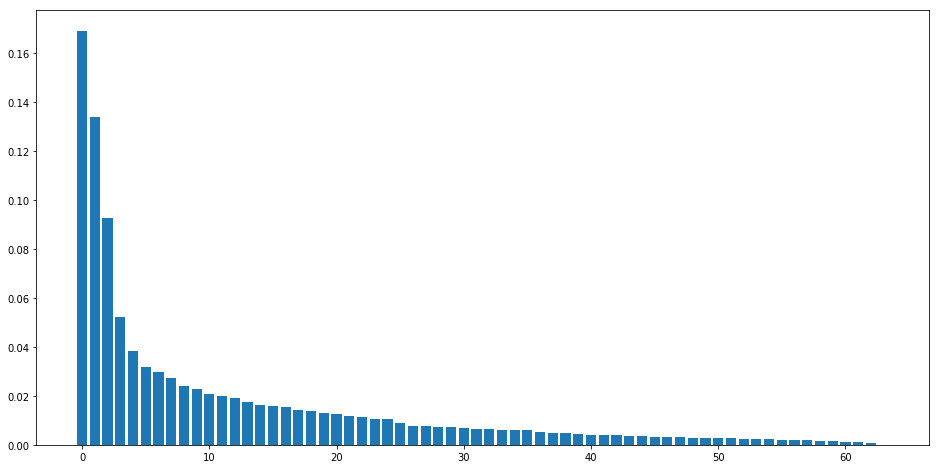

In [98]:
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(ind, vals);

In [99]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(16, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

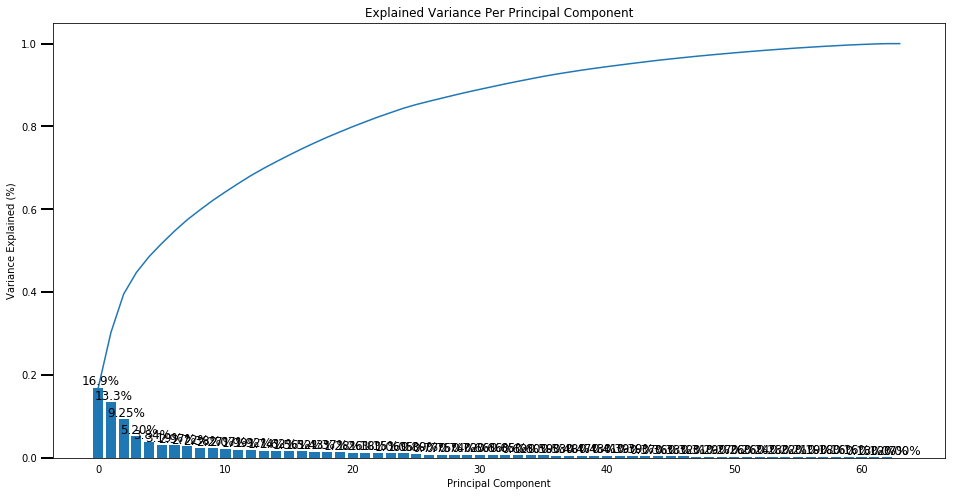

In [100]:
# Cumulative and sequential values
scree_plot(pca)

In [101]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.16902278,  0.30289781,  0.39545175,  0.44751418,  0.48591553,
        0.51781829,  0.54753335,  0.57481743,  0.59862352,  0.62139366,
        0.64217722,  0.66212553,  0.68137646,  0.69878558,  0.71505192,
        0.73072053,  0.74598075,  0.76031392,  0.77405211,  0.78688173,
        0.79950078,  0.8113639 ,  0.82288764,  0.83356164,  0.84406757,
        0.85300203,  0.86075986,  0.86828805,  0.8756984 ,  0.88290108,
        0.88959919,  0.89622082,  0.90279679,  0.90900473,  0.91501405,
        0.92093158,  0.92633002,  0.93117981,  0.93592608,  0.94028776,
        0.94444972,  0.94839556,  0.95230803,  0.95605989,  0.95973192,
        0.96306073,  0.9662759 ,  0.96939189,  0.97230423,  0.97510201,
        0.97775403,  0.98035469,  0.98285405,  0.98518611,  0.9874077 ,
        0.98955061,  0.99146956,  0.99333254,  0.99501693,  0.99665142,
        0.99796286,  0.99918295,  0.99996141,  1.        ])

In [102]:
np.cumsum(pca.explained_variance_ratio_)[:12][-1]

0.66212552698440241

In [103]:
# Re-apply PCA to the data while selecting for number of components to retain.
# Apply PCA without setting up any parameters so all components are computed
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scale)

In [104]:
X_pca.shape

(747109, 12)

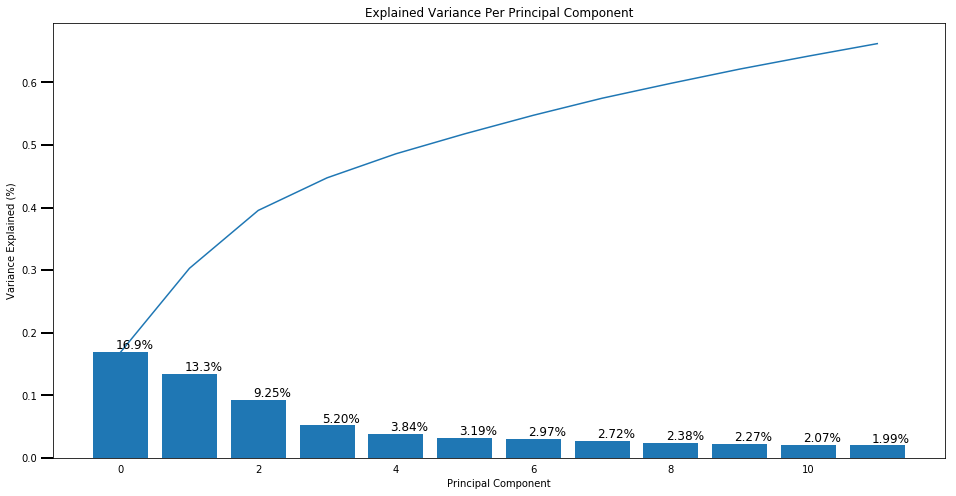

In [105]:
# Cumulative and sequential values
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

Initially PCA was performed without with all components intact. After investigating the variance accounted for by each principal component and the cumsum, 12 components allowed explaining 66% of the variablity in the data. 12 is the value for the number of transformed features that is retained for the clustering part of the project.


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [269]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def weights_viz(x, num=15):
    positive = x.sort_values(ascending=False).head(num)
    negative = x.sort_values(ascending=True).head(num)
    print ('*****POSITIVE WEIGHTS********')
    print (positive)
    print ('*****NEGATIVE WEIGHTS********')
    print (negative)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    ax1.set_title('Positive Weights')
    ax2.set_title('Negative Weights')
    sns.barplot(x=positive.index, y=positive.values, ax=ax1, color='g')
    sns.barplot(x=negative.index, y=negative.values, ax=ax2, color='r')
    plt.gcf().set_size_inches(16, 8)


In [107]:
pca_weights = pd.DataFrame(pca.components_, columns = df.keys())

In [108]:
pca_weights

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,-0.117469,0.005741,-0.219338,0.143639,-0.110545,0.064978,0.073449,0.164506,-0.108324,0.028295,...,0.217775,0.041892,-0.167240,0.144146,0.196961,0.135336,0.099743,-0.106804,0.207790,-0.123553
1,0.260408,0.086402,0.071942,-0.241817,0.233672,-0.212121,-0.231203,0.116124,-0.013394,-0.058083,...,0.086121,0.013031,-0.069426,0.065167,0.088206,0.063045,-0.251494,-0.011307,0.070896,0.002777
2,0.076469,-0.372709,0.159924,-0.103478,0.097453,-0.190490,-0.095106,-0.049543,0.050148,-0.015064,...,0.043171,0.005201,-0.035791,0.032340,0.046162,0.030479,-0.104857,0.049252,0.023714,-0.007885
3,-0.043509,0.040286,0.063913,-0.000161,-0.016311,-0.126461,0.090610,-0.109498,0.389383,0.005483,...,0.079485,0.148261,0.042561,0.046309,0.249792,0.093966,0.039860,0.387605,-0.128118,0.059634
4,0.005383,0.007803,0.086203,-0.006470,-0.064862,0.036137,-0.046176,-0.098063,0.063920,0.012632,...,0.031509,-0.470178,-0.393333,0.217231,0.094818,0.139868,0.028523,0.061673,-0.011514,0.021549
5,0.008936,0.011781,-0.024399,0.004697,-0.039879,0.023107,-0.025197,0.005810,0.010022,-0.014086,...,0.107884,0.065390,-0.025915,-0.154712,-0.067168,-0.205969,0.019153,0.012511,-0.066375,0.036973
6,-0.043015,0.018536,-0.024884,-0.001484,0.036898,-0.013052,-0.005374,0.093364,0.012591,-0.030042,...,-0.054165,-0.227286,-0.124978,-0.107562,-0.016780,-0.051243,-0.022711,0.013680,-0.037796,0.062030
7,0.041053,-0.058525,0.048965,0.062827,-0.014322,0.084644,0.041837,-0.184194,-0.036895,0.192128,...,0.042971,0.183284,0.104534,0.014522,0.105585,0.038859,0.100980,-0.037492,0.034044,-0.081495
8,0.144052,-0.006050,-0.113121,0.108186,-0.108399,0.136067,0.056318,0.113137,0.059732,-0.180064,...,0.057373,-0.011550,-0.057217,-0.028431,-0.122481,-0.031838,0.103232,0.059983,0.074700,-0.019730
9,-0.028987,0.097969,0.060350,-0.132088,0.100326,-0.034969,-0.159165,0.081611,-0.009202,-0.389316,...,0.037522,0.152127,0.082069,0.161543,0.047204,0.071440,-0.152347,-0.007627,0.023632,0.055761


*****POSITIVE WEIGHTS********
PLZ8_ANTG3                0.226444
PLZ8_ANTG4                0.217775
HH_EINKOMMEN_SCORE        0.208237
CAMEO_INTL_2015_WEALTH    0.207790
ORTSGR_KLS9               0.196961
EWDICHTE                  0.196943
FINANZ_HAUSBAUER          0.164506
PLZ8_ANTG2                0.153883
KBA05_ANTG4               0.153015
ARBEIT                    0.144146
FINANZ_SPARER             0.143639
ANZ_HAUSHALTE_AKTIV       0.138408
RELAT_AB                  0.135336
KBA05_ANTG3               0.133858
SEMIO_REL                 0.108931
Name: 0, dtype: float64
*****NEGATIVE WEIGHTS********
MOBI_REGIO                       -0.242497
PLZ8_ANTG1                       -0.224468
KBA05_ANTG1                      -0.223036
FINANZ_MINIMALIST                -0.219338
KBA05_GBZ                        -0.218294
KONSUMNAEHE                      -0.169398
PLZ8_GBZ                         -0.167240
INNENSTADT                       -0.163982
BALLRAUM                         -0.125970
CAME

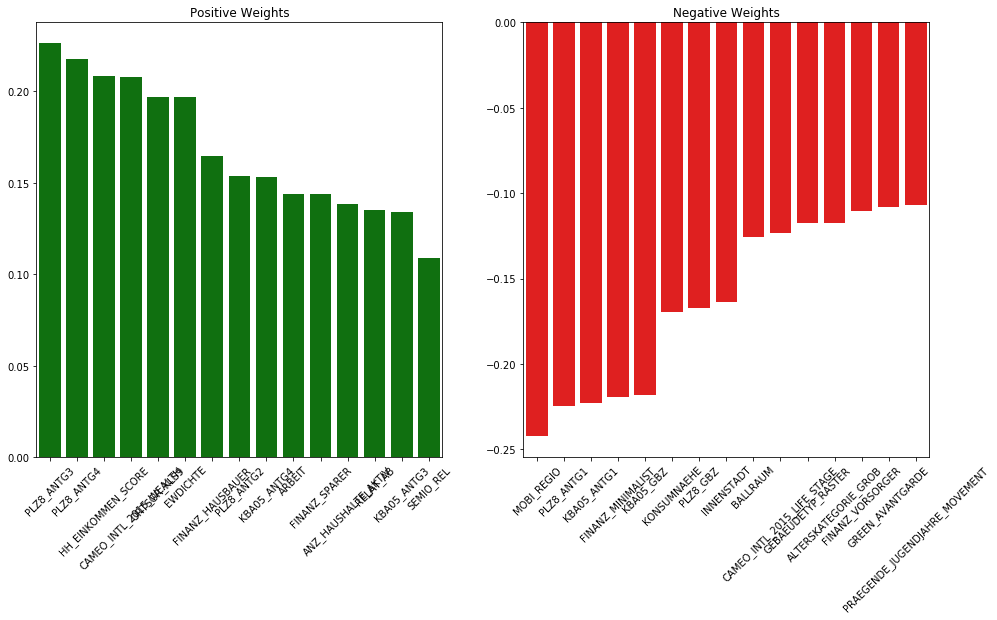

In [109]:
# first principal component
weights_viz(pca_weights.iloc[0])

*****POSITIVE WEIGHTS********
ALTERSKATEGORIE_GROB    0.260408
FINANZ_VORSORGER        0.233672
SEMIO_ERL               0.229657
SEMIO_LUST              0.181208
RETOURTYP_BK_S          0.168129
FINANZ_HAUSBAUER        0.116124
W_KEIT_KIND_HH          0.116040
SEMIO_KRIT              0.113615
SEMIO_KAEM              0.105414
PLZ8_ANTG3              0.090808
EWDICHTE                0.090488
ORTSGR_KLS9             0.088206
ANREDE_KZ               0.086402
PLZ8_ANTG4              0.086121
FINANZ_MINIMALIST       0.071942
Name: 1, dtype: float64
*****NEGATIVE WEIGHTS********
SEMIO_REL                      -0.260871
PRAEGENDE_JUGENDJAHRE_DECADE   -0.251494
FINANZ_SPARER                  -0.241817
FINANZ_UNAUFFAELLIGER          -0.231203
SEMIO_TRADV                    -0.227627
SEMIO_PFLICHT                  -0.226339
SEMIO_KULT                     -0.216798
FINANZ_ANLEGER                 -0.212121
SEMIO_FAM                      -0.178962
SEMIO_RAT                      -0.169941
ONLINE_AFFI

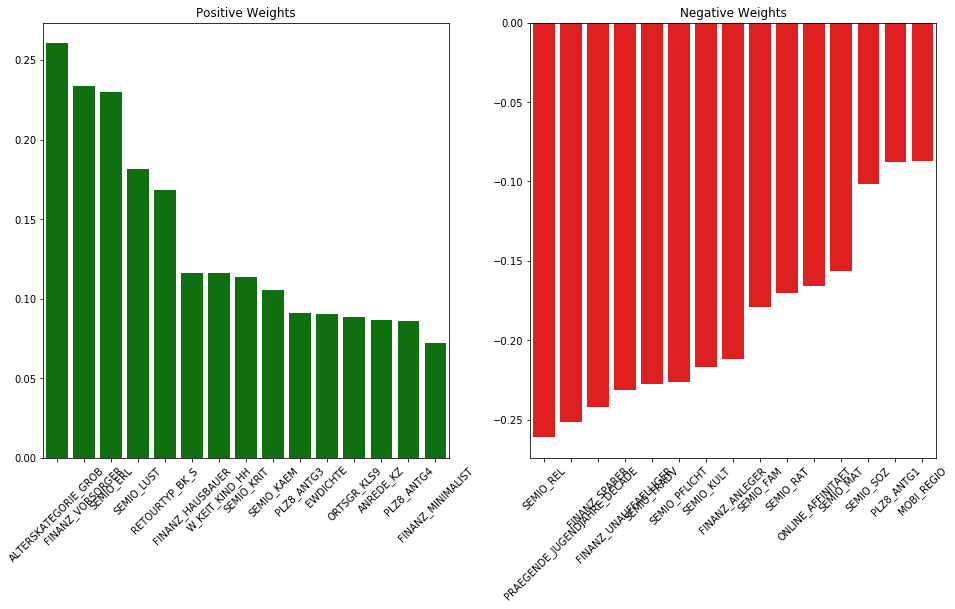

In [110]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# second principal component
weights_viz(pca_weights.iloc[1])

*****POSITIVE WEIGHTS********
SEMIO_VERT                        0.352415
SEMIO_SOZ                         0.266432
SEMIO_FAM                         0.252905
SEMIO_KULT                        0.235414
FINANZ_MINIMALIST                 0.159924
RETOURTYP_BK_S                    0.112015
FINANZ_VORSORGER                  0.097453
W_KEIT_KIND_HH                    0.087815
SEMIO_REL                         0.078634
ALTERSKATEGORIE_GROB              0.076469
SEMIO_LUST                        0.063535
SEMIO_MAT                         0.054569
GREEN_AVANTGARDE                  0.050148
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.049252
EWDICHTE                          0.046481
Name: 2, dtype: float64
*****NEGATIVE WEIGHTS********
ANREDE_KZ                      -0.372709
SEMIO_KAEM                     -0.333205
SEMIO_DOM                      -0.308663
SEMIO_KRIT                     -0.271328
SEMIO_RAT                      -0.211876
FINANZ_ANLEGER                 -0.190490
SEMIO_ERL                

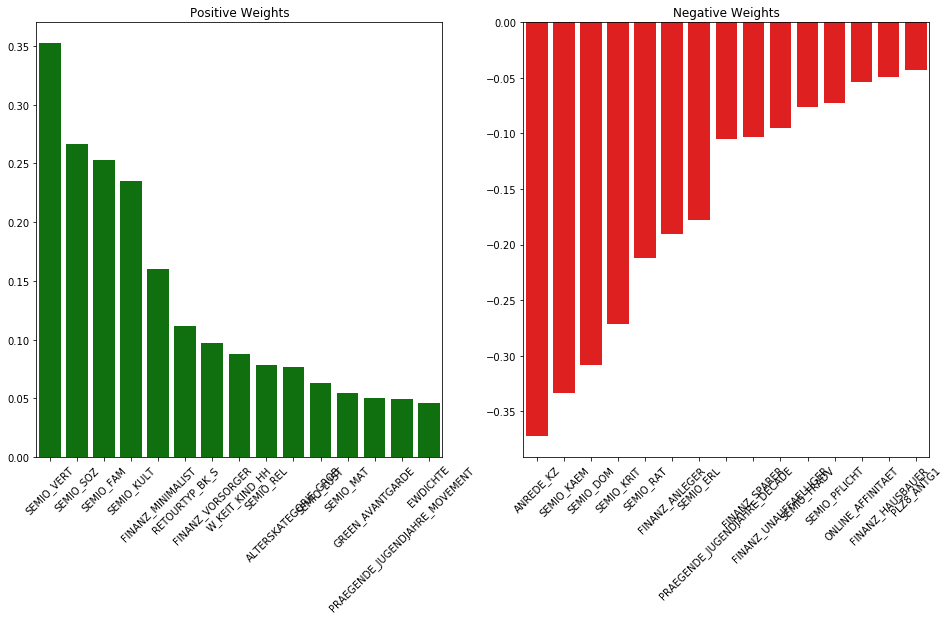

In [111]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# third principal component
weights_viz(pca_weights.iloc[2])

### Discussion 2.3: Interpret Principal Components


The weights for the first three principal components were mapped to corresponding feature names. The positive and negative weights for each of these components was printed and visualized to study the correlation. For the first principal component, these were the results:

#### First Principal Component
> Positive Weights 
- PLZ8_ANTG3: high share of 6-10 family houses in the PLZ8 region 
- PLZ8_ANTG4: high number of 10+ family houses in the PLZ8 region
- HH_EINKOMMEN_SCORE: low estimated household net income
- CAMEO_INTL_2015_WEALTH: German CAMEO: poor households

> Negative Weights
- MOBI_REGIO: low movement patterns
- PLZ8_ANTG1: high number of 1-2 family houses in the PLZ8 region
- KBA05_ANTG1: high number of 1-2 family houses in the microcell
- FINANZ_MINIMALIST: low financial interest

The first principal component seems to encapsulate financial information and population density. There is a positive correlation between high density area and low net income and poor households. 

#### Second Principal Component
> Positive Weights 
- ALTERSKATEGORIE_GROB: Old age
- FINANZ_VORSORGER: low level of preparation
- SEMIO_ERL : low level of event oriented   
- SEMIO_LUST: low level of sensual-minded             

> Negative Weights
- SEMIO_REL: low affinity towards religion                    
- PRAEGENDE_JUGENDJAHRE_DECADE: born on the later decade, young population  
- FINANZ_SPARER: low money saver                  
- FINANZ_UNAUFFAELLIGER : very low financially noticeable 

The second principal component seems to encapsulate age, spending habit and personality traits. People in old age have low level of financial preparation and are not event oriented or sensual minded. However, younger generation have low affinity towards religion and are low money savers. 

#### Third Principal Component
> Positive Weights 
- SEMIO_VERT: Personality typology, low affinity towards dreams              
- SEMIO_SOZ : low affinity towards society             
- SEMIO_FAM : low affinity towards family            
- SEMIO_KULT: low affinity towards culture                      

> Negative Weights
- ANREDE_KZ  : Female                    
- SEMIO_KAEM : low affinity towards combat                    
- SEMIO_DOM  : low affinity towards being dominant minded                   
- SEMIO_KRIT : low affinity towards being critically minded  

The third principal component seems to encapsulate gender and personal affinity towards family, culture, society, being culturally minded etc. There is a correlation between female and low affinity towards combat, being dominant minded and being critically minded. 

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [112]:
# Over a number of different cluster counts...
# run k-means clustering on the data and..
# compute the average within-cluster distances.

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = {}
centers = list(range(2,20))

# for center in centers:
#     scores[center] = get_kmeans_score(X_pca, center)

Storing the dict for future usage
>{2: 25829714.32066194,
 3: 22683012.87144027,
 4: 20767904.095479775,
 5: 19436719.29545633,
 6: 18264785.836567115,
 7: 17254120.873060547,
 8: 16454210.399317885,
 9: 15833307.46548882,
 10: 15355469.995319635,
 11: 14876674.951499756,
 12: 14486235.02403522,
 13: 14191019.506396288,
 14: 13922578.868160639,
 15: 13686136.852369113,
 16: 13460419.749609208,
 17: 13259054.527985176,
 18: 13058831.1209397,
 19: 12862299.496048836}

In [113]:
scores = {2: 25829714.32066194,
 3: 22683012.87144027,
 4: 20767904.095479775,
 5: 19436719.29545633,
 6: 18264785.836567115,
 7: 17254120.873060547,
 8: 16454210.399317885,
 9: 15833307.46548882,
 10: 15355469.995319635,
 11: 14876674.951499756,
 12: 14486235.02403522,
 13: 14191019.506396288,
 14: 13922578.868160639,
 15: 13686136.852369113,
 16: 13460419.749609208,
 17: 13259054.527985176,
 18: 13058831.1209397,
 19: 12862299.496048836}

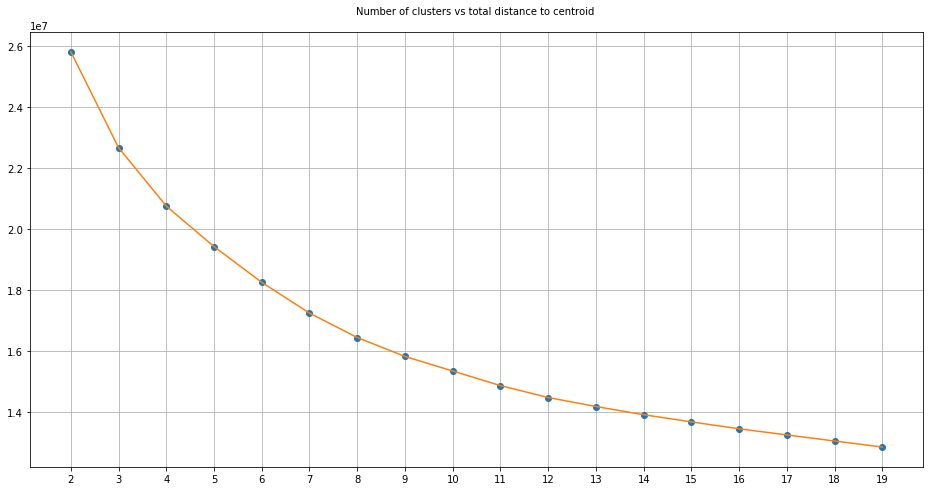

In [114]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship

fig, ax = plt.subplots()
plt.grid()
s_series = pd.Series(scores)
plt.title('Number of clusters vs total distance to centroid \n', fontsize = 10)
plt.plot(s_series, 'o')
plt.plot(s_series)
ax.set_xticks(np.arange(2, 20))
plt.gcf().set_size_inches(16, 8)

In [168]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=8, random_state=42)
model = kmeans.fit(X_pca)

### Discussion 3.1: Apply Clustering to General Population

K means clustering with a number of different cluster counts was applied (2-19). Although the elbow shape seems unclear here, it looks like the rate at which the slope does not descend much is at 8. Therefore, 8 clusters is used to segment the population.  

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [169]:
# Load in the customer demographics data.
customers = pd.read_csv('./Udacity_CUSTOMERS_Subset.csv', sep=';')

In [170]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [171]:
customers.shape

(191652, 85)

In [172]:
clean_customers, nan_customers = clean_data(customers)

(191652, 85)
convert missing value codes into NaNs
(191652, 85)
remove selected columns
(191652, 79)
remove selected rows
(133427, 79)
select, re-encode, and engineer column values
(133427, 64)
return cleaned dataframe


In [173]:
nan_customers.shape

(58225, 79)

In [174]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

In [175]:
# Total number of missing values
clean_customers.isnull().sum().sum()

44330

In [176]:
clean_customers.isnull().sum().sum()/(clean_customers.shape[0]*clean_customers.shape[1])

0.0051912750043094725

In [177]:
X_customer_imputed = imputer.transform(clean_customers)

In [178]:
X_customer_scaled = scaler.transform(X_customer_imputed)

In [179]:
X_customer_pca = pca.transform(X_customer_scaled)

In [180]:
X_customer_pca.shape

(133427, 12)

In [181]:
X_customer_kmeans = model.predict(X_customer_pca)

In [275]:
df_customer_pca = pd.DataFrame(X_customer_pca, columns=np.arange(1, 13))

In [221]:
df_customer_pca.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000,133427.000000
mean,-2.420121,1.310225,1.459639,0.926344,-0.021075,0.017136,0.159705,0.004394,0.218014,0.331597,0.304431,-0.015051
std,2.719404,2.177324,2.195574,2.011800,1.504524,1.364617,1.365910,1.416957,1.265237,1.058515,1.119948,1.107394
min,-7.957291,-7.519124,-4.753557,-5.341238,-6.095442,-3.496451,-9.768570,-5.195939,-5.271990,-4.545073,-4.169303,-5.799558
25%,-4.481219,-0.028094,-0.776496,-0.708233,-0.983012,-0.793407,-0.346304,-0.998122,-0.635182,-0.386764,-0.452440,-0.795584
50%,-3.155340,1.249605,2.196784,0.962448,0.083833,-0.116313,0.301300,0.036654,0.179256,0.356207,0.302795,-0.107488
75%,-0.792495,2.715570,3.232509,2.563767,1.013832,0.619067,0.919394,1.009369,1.040462,1.063868,1.058965,0.725311
max,11.321041,10.919433,6.259893,9.463746,6.792284,29.720287,17.822199,7.677338,7.313684,5.417265,4.884125,5.150562


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [222]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# adding removed nan's to a cluster of its own
# customer population
customer_with_nan = np.append (X_customer_kmeans, [-1]*nan_customers.shape[0])
# general population
azdias_with_nan = np.append(model.labels_, [-1]*azdias_above_missing_threshold.shape[0])

In [223]:
# customer polulation proportions with nan cluster included
customer_clusters_count = np.unique(customer_with_nan, return_counts=True)[1]
customer_proportion = customer_clusters_count/customer_clusters_count.sum()

In [224]:
customer_dict = dict(zip(list(range(-1,8)), customer_proportion))

In [225]:
customer_dict

{-1: 0.30380585644814562,
 0: 0.074061319474881551,
 1: 0.012830547033164276,
 2: 0.0070179283284286104,
 3: 0.35250871371026654,
 4: 0.13505729134055475,
 5: 0.0072214221610001463,
 6: 0.088890280299709884,
 7: 0.018606641203848643}

In [226]:
# general population proportions with nan cluster included
azdias_clusters_count = np.unique(azdias_with_nan, return_counts=True)[1]
azdias_proportion = azdias_clusters_count/azdias_clusters_count.sum()

In [227]:
azdias_dict = dict(zip(list(range(-1,8)), azdias_proportion))

In [228]:
azdias_dict

{-1: 0.16170175523242833,
 0: 0.11693508119759297,
 1: 0.092207207864267116,
 2: 0.074813093497572425,
 3: 0.14002924078315029,
 4: 0.13744851164862587,
 5: 0.088636825209459827,
 6: 0.11302471553071572,
 7: 0.075203569036187426}

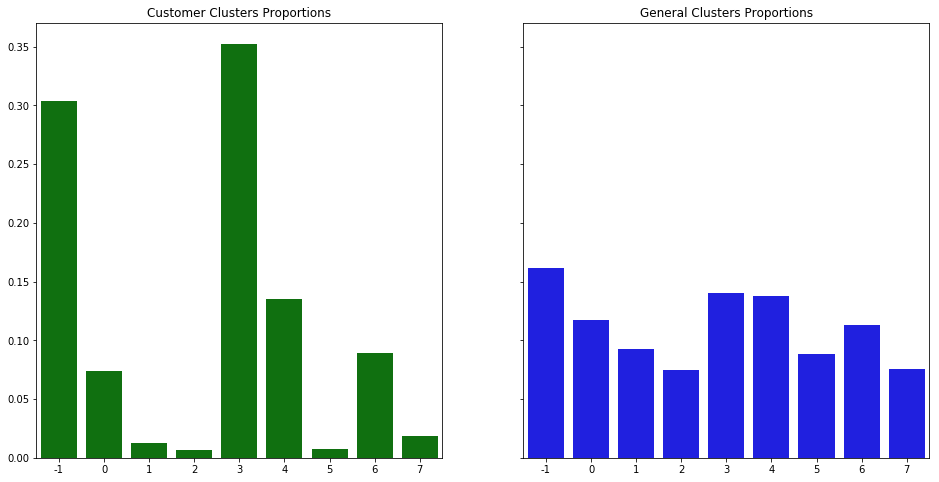

In [229]:
lists_customer = sorted(customer_dict.items()) 
cust_x, cust_y = zip(*lists_customer)
lists_azdias = sorted(azdias_dict.items()) 
azdias_x, azdias_y = zip(*lists_azdias)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.set_title('Customer Clusters Proportions')
ax2.set_title('General Clusters Proportions')
sns.barplot(x=cust_x, y=cust_y, ax=ax1, color='g')
sns.barplot(x=azdias_x, y=azdias_y, ax=ax2, color='b')
plt.gcf().set_size_inches(16, 8)

In [230]:
# Cluster 3 is the most overrepresented and cluster 2 is the most underrepresented. 

In [276]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
df_customer_pca = df_customer_pca.rename(columns={1: 'PCA 1-fin_pop',
        2: 'PCA 2- age_trait', 3: 'PCA 3- gender_culture'})

In [277]:
weights = pd.DataFrame(kmeans.cluster_centers_, columns=df_customer_pca.keys())
weights

,PCA 1-fin_pop,PCA 2- age_trait,PCA 3- gender_culture,4,5,6,7,8,9,10,11,12
0,1.696769,4.002077,-1.450446,-0.194719,-0.108297,0.030991,-0.130491,0.031768,0.238880,-0.068848,-0.010725,0.006475
1,-0.920265,-2.988036,-3.078430,0.072970,-0.123237,0.077236,0.151310,-0.370763,-0.251068,0.299339,0.074458,0.022949
2,4.229169,-2.538073,2.389954,-0.077422,0.032080,0.034937,-0.029762,0.160249,0.289860,-0.277471,-0.296894,-0.284800
3,-3.400737,-0.018343,2.215698,-0.012534,0.096414,-0.015994,0.043408,0.129286,-0.203976,-0.069926,0.064053,0.147463
4,-3.458487,1.634332,-1.817249,0.291521,0.190502,0.048535,0.050182,0.087928,0.058959,-0.015710,-0.104792,-0.097922
5,4.381611,-1.200863,-2.615279,0.362739,0.062815,-0.077442,0.106238,-0.271134,-0.163998,0.469711,0.116774,-0.044453
6,1.910115,1.914516,2.762611,-0.367794,-0.155737,-0.141834,-0.185675,0.061953,-0.070876,-0.123394,0.288625,0.302337
7,-1.100632,-4.448552,1.778408,-0.093802,-0.080039,0.067805,0.028312,0.070779,0.219711,-0.193030,-0.278255,-0.252341


*****POSITIVE WEIGHTS********
PCA 3- gender_culture    2.215698
12                       0.147463
8                        0.129286
5                        0.096414
11                       0.064053
Name: 3, dtype: float64
*****NEGATIVE WEIGHTS********
PCA 1-fin_pop      -3.400737
9                  -0.203976
10                 -0.069926
PCA 2- age_trait   -0.018343
6                  -0.015994
Name: 3, dtype: float64


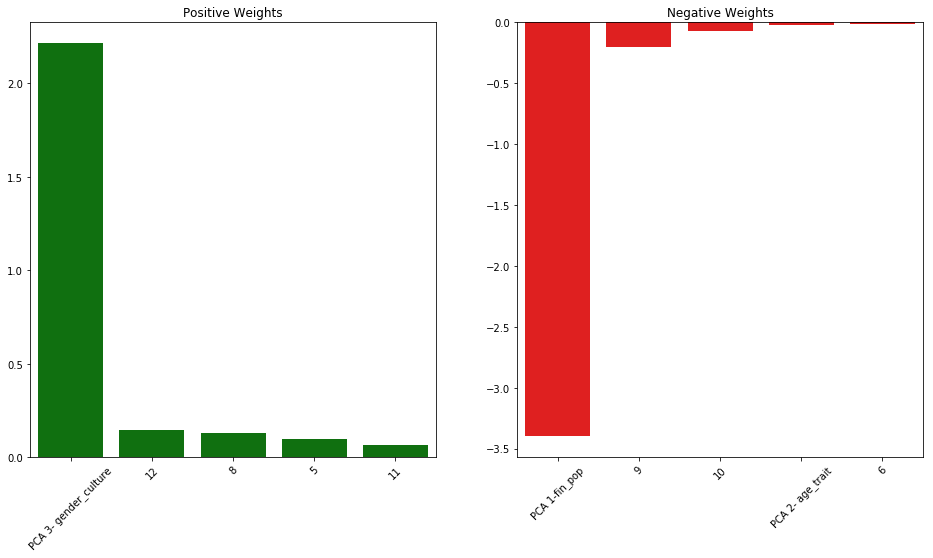

In [278]:
weights_viz(weights.iloc[3], 5)

*****POSITIVE WEIGHTS********
PCA 1-fin_pop            4.229169
PCA 3- gender_culture    2.389954
9                        0.289860
8                        0.160249
6                        0.034937
Name: 2, dtype: float64
*****NEGATIVE WEIGHTS********
PCA 2- age_trait   -2.538073
11                 -0.296894
12                 -0.284800
10                 -0.277471
4                  -0.077422
Name: 2, dtype: float64


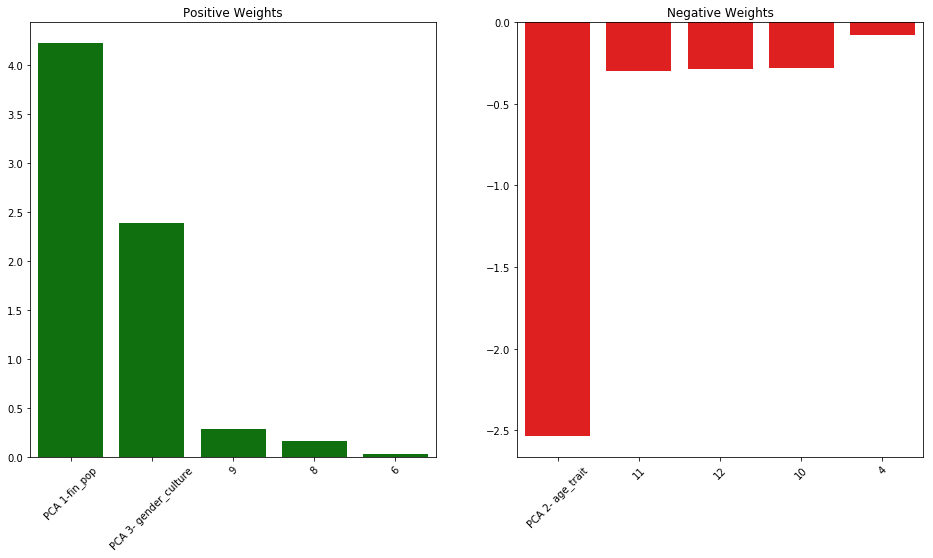

In [279]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
weights_viz(weights.iloc[2], 5)

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

The data based on demographics of the general population of Germany was clustered and the customer data for a mail-order sales company was mapped onto the clusters in the previous step. First of all, the proportion of data points (8 pca) was computed to identify how customer data were being mapped into different clusters. A separate cluster, identified by -1 was assigned for nan values. Cluster 3 is the most overrepresented and cluster 2 is the most underrepresented. For the overrepresented cluster (3), the largest positive weight was PCA-3 which from previous analysis we have established to encapsulate gender and personal affinity towards family, culture, society, being culturally minded etc. The positive value implies gender male, with high affinity towards combat, being dominant minded, being critically minded. This segment is relatively popoular with the mail-order company. For the underrepresented cluster (2) the largest positive weight was PCA-1 which from previous analysis we have established to encapsulate encapsulate financial information and population density. 

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.